### PCA plot of tpm for ENSMUSG with gene names
* no normalization here
* next use tpm, but better if ebseq prints final matrix
* discard mappings of many ensmusg to one gene

In [1]:
import pandas, seaborn, os, csv
from scipy import stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import display
pandas.set_option('display.max_rows', 1000)
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import cm
from numpy import linspace

In [2]:
DATA = '../data/'
# where are the spikes?

In [4]:
# matrix is gene x sample
# need sample x gene for pca
df = pandas.read_csv(DATA + 'tpm.gene.mat', sep='\t')
df2 = df.ix[:, 1:] # ignore gene ID
df2.index = df['gene_id']
# remove constant genes
df3 = df2[ df2.max(axis=1) != df2.min(axis=1) ]
labels = [ x.split('/')[-1].split('.tsv')[0] for x in df3.columns.values ]
# transpose !!
df4 = df3.transpose()
pca = PCA(n_components=2)
X_r = pca.fit(df4).transform(df4)

In [5]:
# make colors
start = 0.0
stop = 1.0
number_of_lines= 10
cm_subsection = linspace(start, stop, number_of_lines)
colors = [ cm.Dark2(x) for x in cm_subsection ]

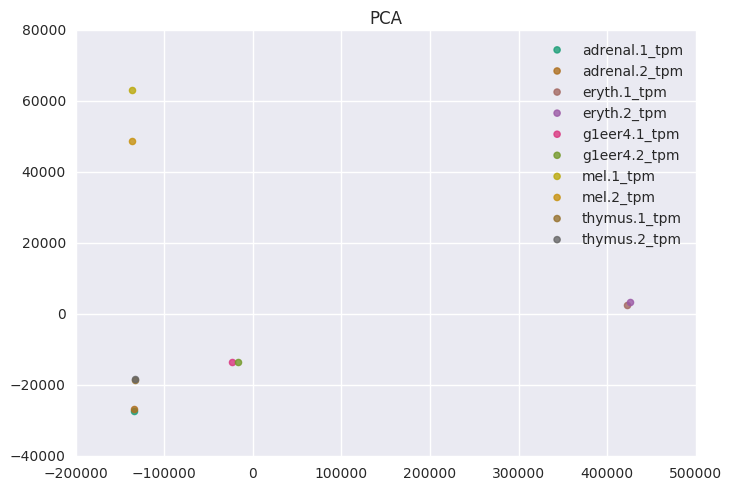

In [13]:
plt.figure()
lw = 1
for color, x, target_name in zip(colors, X_r, labels):
    plt.scatter(x[0], x[1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

In [9]:
df2.sort_values(by='eryth.1_tpm', ascending=0)

,adrenal.1_tpm,adrenal.2_tpm,eryth.1_tpm,eryth.2_tpm,g1eer4.1_tpm,g1eer4.2_tpm,mel.1_tpm,mel.2_tpm,thymus.1_tpm,thymus.2_tpm
gene_id,,,,,,,,,,
mt-Rnr2,28.18,38.79,418112.09,429601.87,68987.23,73113.43,690.21,329.20,384.45,665.18
mt-Rnr1,5.42,17.16,366014.74,357317.84,87397.90,92682.98,98.81,24.19,105.10,148.70
mt-Co1,7234.69,7489.83,23894.38,25214.27,5445.01,5514.79,673.14,574.95,7147.20,10915.66
mt-Atp8,244.78,96.86,22305.24,21963.11,13107.66,15848.62,539.56,487.58,7668.72,8270.12
mt-Atp6,1326.43,1210.21,13289.24,14079.21,1558.82,4948.24,278.27,276.39,2064.68,2583.87
Hba-a2,1252.05,1558.59,7178.33,7473.75,162.42,156.57,2828.39,5996.70,1875.56,2081.86
Hbb-b1,605.50,862.78,6827.28,7813.65,993.85,1008.37,1268.28,2940.72,1310.64,1811.38
mt-Nd4,717.17,887.10,3823.17,4173.78,4327.78,4550.68,34.50,19.18,702.26,850.58
mt-Co2,259.73,121.17,3561.98,2822.59,8.75,19.52,464.70,439.82,1578.84,1409.04


In [10]:
df2.sort_values(by='mel.1_tpm', ascending=0)

,adrenal.1_tpm,adrenal.2_tpm,eryth.1_tpm,eryth.2_tpm,g1eer4.1_tpm,g1eer4.2_tpm,mel.1_tpm,mel.2_tpm,thymus.1_tpm,thymus.2_tpm
gene_id,,,,,,,,,,
snoU6-77,0.00,0.00,4.92,0.00,38.56,24.22,60481.11,47181.43,0.00,0.00
Snora73b,28.49,111.70,43.77,38.58,70.52,92.18,28756.78,27331.83,68.72,123.74
Snord15b,0.00,0.00,35.10,51.99,24.74,33.80,26455.76,17796.60,0.00,0.00
RNase_MRP,1132.29,1589.56,583.10,474.06,1477.63,1232.78,18379.05,18573.70,4668.21,7137.52
SNORA8,0.00,0.00,1.33,0.00,2.14,1.21,16397.01,13513.69,0.00,0.00
Snora73a,14.24,49.64,12.99,6.65,71.08,70.38,15668.14,16746.11,57.27,28.56
SNORD94,0.00,0.00,1.33,0.00,0.00,9.66,12697.87,8257.83,0.00,0.00
snoU97,0.00,0.00,2.39,0.00,2.38,20.12,12487.38,11017.26,0.00,0.00
Snora52,0.00,0.00,5.22,0.00,14.83,1.68,8880.44,8016.64,0.00,0.00


In [11]:
df2.sort_values(by='g1eer4.1_tpm', ascending=0)

,adrenal.1_tpm,adrenal.2_tpm,eryth.1_tpm,eryth.2_tpm,g1eer4.1_tpm,g1eer4.2_tpm,mel.1_tpm,mel.2_tpm,thymus.1_tpm,thymus.2_tpm
gene_id,,,,,,,,,,
mt-Rnr1,5.42,17.16,366014.74,357317.84,87397.90,92682.98,98.81,24.19,105.10,148.70
mt-Rnr2,28.18,38.79,418112.09,429601.87,68987.23,73113.43,690.21,329.20,384.45,665.18
mt-Atp8,244.78,96.86,22305.24,21963.11,13107.66,15848.62,539.56,487.58,7668.72,8270.12
mt-Nd2,240.95,264.61,1102.17,1245.02,7994.14,8723.61,36.62,20.02,234.13,276.29
mt-Cytb,1569.00,1718.96,2885.45,3103.61,6385.33,6417.17,90.90,63.14,2000.33,2239.65
mt-Co1,7234.69,7489.83,23894.38,25214.27,5445.01,5514.79,673.14,574.95,7147.20,10915.66
Eef1a1,825.56,868.28,188.69,217.21,4989.69,5202.81,1444.66,1605.60,3873.92,3352.30
AC027184.1,729.10,801.48,843.49,782.89,4795.49,4525.12,2899.93,2741.23,2662.22,3806.10
mt-Nd4,717.17,887.10,3823.17,4173.78,4327.78,4550.68,34.50,19.18,702.26,850.58


In [12]:
df2.sort_values(by='adrenal.1_tpm', ascending=0)

,adrenal.1_tpm,adrenal.2_tpm,eryth.1_tpm,eryth.2_tpm,g1eer4.1_tpm,g1eer4.2_tpm,mel.1_tpm,mel.2_tpm,thymus.1_tpm,thymus.2_tpm
gene_id,,,,,,,,,,
Fth1,23153.83,19613.35,54.94,51.15,519.64,485.28,188.78,180.19,1414.13,1156.05
Cyp21a1,14482.88,19341.34,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.12
Rplp1,10888.31,12220.19,31.77,43.76,590.12,573.30,1798.92,1545.10,7568.38,8658.10
Cfd,9883.52,3984.45,0.00,0.00,0.00,0.00,0.00,0.00,819.83,680.24
Igfbp7,9697.19,5510.12,0.04,0.00,0.00,0.00,0.00,0.00,368.91,290.86
Atp5b,9695.82,7142.99,26.10,24.91,554.28,540.71,234.40,244.21,3351.18,3252.13
Fasn,9219.48,6751.82,0.31,0.42,47.70,45.85,37.06,20.62,1367.78,708.43
Ftl1,7434.58,6973.03,69.04,84.80,564.57,553.75,254.33,341.58,2219.56,1959.30
Chchd10,7371.45,4781.06,0.54,0.84,17.49,14.97,20.63,14.41,142.86,154.90


In [14]:
df2.sort_values(by='thymus.1_tpm', ascending=0)

,adrenal.1_tpm,adrenal.2_tpm,eryth.1_tpm,eryth.2_tpm,g1eer4.1_tpm,g1eer4.2_tpm,mel.1_tpm,mel.2_tpm,thymus.1_tpm,thymus.2_tpm
gene_id,,,,,,,,,,
Actb,3837.41,3949.71,107.50,112.82,792.16,824.36,277.51,240.57,7914.33,5362.14
mt-Atp8,244.78,96.86,22305.24,21963.11,13107.66,15848.62,539.56,487.58,7668.72,8270.12
Rplp1,10888.31,12220.19,31.77,43.76,590.12,573.30,1798.92,1545.10,7568.38,8658.10
mt-Co1,7234.69,7489.83,23894.38,25214.27,5445.01,5514.79,673.14,574.95,7147.20,10915.66
Rpl13a,514.76,473.28,24.28,37.29,288.68,258.93,267.37,243.42,5267.90,4979.21
Hist1h2af,14.55,57.55,0.99,1.71,220.70,180.43,93.19,85.90,4995.10,3222.94
RNase_MRP,1132.29,1589.56,583.10,474.06,1477.63,1232.78,18379.05,18573.70,4668.21,7137.52
Tuba1b,628.97,726.82,38.64,47.05,525.81,595.72,193.76,124.15,4245.08,3023.78
Rps12,1935.64,1673.85,50.64,72.45,376.49,397.82,791.38,752.91,3944.18,4680.27
